# Laboratorio 7: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>


### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliares: Catherine Benavides y Consuelo Rojas
- Ayudante: Nicolás Ojeda, Eduardo Moya

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1:Benjamín Aguilar
- Nombre de alumno 2: Sebastián Vásquez

### **Link de repositorio de GitHub:** `https://github.com/sbstnvsqz0/MDS7202`

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.



### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

1. Los datos de entrenamiento son los utilizados para entrenar los parámetros de un modelo en específico, siendo generalmente el conjunto más grande, mientras que los datos de validación son un conjuntos disjunto con el de entrenamiento, que ayudan a poder evaluar el modelo y poder ajustar hiperparámetros o elegir un modelo en específico según las métricas de evaluación obtenidas para la predicción sobre este conjunto.
2. El hecho de que no exista un valor a predecir o de referencia para el modelo de clasificacón, hace que la evaluación de este modelo no sea del todo clara, obteniendo resultados que se tienen que interpretar y que no necesariamente es fácil de hacer.
3. La matriz de confusión es una matriz utilizada para la evaluación de clasificaciones multiclase, donde se comparan porcentajes para cada clase según lo que un modelo predijo para ella, obteniendo el porcentaje de verdaderos positivos y los porcentajes de confusión (modelo escoge una etiqueta distinta a la que debería ser) para cada otra etiqueta disponible en el problema. 
4. - Accuracy: $\frac{TP+TN}{TP+TN+FP+FN}$. Da noción del porcentaje de acierto en la predicción de un modelo entre todo el conjunto sobre el que se predijo.
    - Presicion: $\frac{TP}{TP+FP}$. Describe el porcentaje de acierto sobre una misma clase, es decir, de las clases que se predijeron como "k", cual es el porcentaje que realmente es "k".
    - Recall: $\frac{TP}{TP+FN}$. También describe un porcentaje de acierto sobre una misma clase: De las clases que realmente son "k", cual es el porcentaje en que acertó el modelo en la predicción. 
    - F1 Score:  $\frac{2TP}{2TP+FP+FN}$ Aquí se combinan la presicion y recall para dar una métrica conjunta que les da significancia a ambos porcentajes, dando nuevamente una noción de porcentaje en la exactitud de las predicciones de un modelo.
5. - En este caso lo importante es evitar el hecho de fallar en el mantenimiento cuando este era necesario para tener la menor cantidad de pérdidas y no hacer mantenimientos cuando no toca debido a que estos deberían a priori ser caros. Agregando a esto que las fallas deberían ser extrañas, se tendría un desbalance, con lo cual la mejor métrica debería ser F1-Score.
    - Para enfermedades altamente contagiosas, se querría evitar no detectar la enfermedad para individuos que si la poseen para evitar la extensión. En ese sentido se debe tener en cuenta los Falsos negativos principalmente. Por esto se usará recall.
    - Para la aprobación de créditos de alto riesgo. Se quiere principalmente no aprobar a clientes que efectivamente produzcan pérdidas. Entonces hay principal problema con los FP (aprobar a clientes que no se debería haber aprobado). Por esto se usará presicion. 
    - Para la detección de crímenes no se quiere ni detectar erroneamente, ni fallar en la detección. En ese sentido la mejor métrica a usar es el F1-Score o accuracy.
6. Básicamente es ajustar una función a las probabilidades predichas por el clasificador. Sirve para evitar sesgos intrínsecos en las distribuciones de salida de los modelos, para tener noción de valor esperado a largo plazo y para que los modelos trabajen bien de manera independiente en la estimación de sus probabilidades.

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

### Tarea 1

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("stats_players.csv")
df["label"] = df["National_Position"].apply(lambda x: 0 if pd.isna(x) else 1)

### Tarea 2

In [2]:
df["label"].value_counts()

label
0    16513
1     1075
Name: count, dtype: int64

En este caso se tiene un problema con el desbalance de las clases, mostrandose muchos más jugadores no seleccionados que seleccionados.

### Tarea 3

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, MinMaxScaler
col_transformer = ColumnTransformer([("Standard Scaler",StandardScaler(),["Height","Weight"]),
                                     ("Encoder",OneHotEncoder(sparse_output=False,),["Club_Position","Preffered_Foot","Work_Rate"]),
                                     ("Robust Scaler",RobustScaler(),df.loc[:,~df.columns.isin(["label","Name","Nationality","National_Position","Height","Weight","Club_Position","Preffered_Foot","Work_Rate"])].columns),
                                     ],
                                     remainder="drop")

### Tarea 4

- Name: A priori no se utilizará.
- Nationality: Se podría utilizar un OneHotEncoder, aunque a priori no se utilizará
- National_Position: No tiene sentido usarla debido a que se representa con el label.
- Club_Position: Se podría utilizar OneHotEncoder
- Height: Por como distribuye se utilizará un StandardScaler
- Weight: Por como distribuye se utilizará un StandardScaler
- Preffered_Foot: Se puede utilizar un OneHotEncoder
- Age: Por como distribuye se utilizará un RobustScaler
- Work_Rate: Como son 9 valores distintos, se puede utilizar un OneHotEncoder
- Weak_foot: Se utilizará un RobustScaler
- Skill_Moves: Se utilizará un RobustScaler
- Las demás variables: RobustScaler


### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

### Tarea 1

In [4]:
from sklearn.model_selection import train_test_split
SEED = 40


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,~df.columns.isin(["label"])],df["label"],test_size=0.2,random_state=SEED,stratify=df["label"])

In [6]:
train_rate = np.unique(y_train,return_counts=True)[-1][0]/np.unique(y_train,return_counts=True)[-1][1]
test_rate = np.unique(y_test,return_counts=True)[-1][0]/np.unique(y_test,return_counts=True)[-1][1]
print(f"Proporción de clases en entrenamiento: {train_rate}\n"
      +f"Proporción de clases en test: {test_rate}\n"
      +f"Proporción de clases en dataset original: {16513/1075}")

Proporción de clases en entrenamiento: 15.36046511627907
Proporción de clases en test: 15.362790697674418
Proporción de clases en dataset original: 15.36093023255814


### Tarea 2

In [15]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
pipeline_xgboost = Pipeline([("transformer",col_transformer),("xgboost",XGBClassifier())])
pipeline_lightgbm = Pipeline([("transformer",col_transformer),("lightgbm",LGBMClassifier(verbose=0))])


### Tarea 3

In [16]:
xgb_model = pipeline_xgboost.fit(X=X_train,y=y_train)
lgbm_model = pipeline_lightgbm.fit(X_train,y_train)

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

### Tarea 1

In [17]:
xgb_results = xgb_model.predict(X_test)
lgbm_results = lgbm_model.predict(X_test)

In [18]:
acc_xgb  = np.array([xgb_results[k]==y_test.values[k] for k in range(len(y_test))]).sum()/len(y_test)
acc_lgbm = np.array([lgbm_results[k]==y_test.values[k] for k in range(len(y_test))]).sum()/len(y_test)
presicion_xgb = np.array([xgb_results[k]==y_test.values[k] and xgb_results[k]==1 for k in range(len(y_test))]).sum()/np.array([xgb_results[k]==1 for k in range(len(y_test))]).sum()
presicion_lgbm = np.array([lgbm_results[k]==y_test.values[k] and lgbm_results[k]==1 for k in range(len(y_test))]).sum()/np.array([lgbm_results[k]==1 for k in range(len(y_test))]).sum()
recall_xgb = np.array([xgb_results[k]==y_test.values[k] and xgb_results[k]==1 for k in range(len(y_test))]).sum()/np.array([y_test.values[k]==1 for k in range(len(y_test))]).sum()
recall_lgbm = np.array([lgbm_results[k]==y_test.values[k] and lgbm_results[k]==1 for k in range(len(y_test))]).sum()/np.array([y_test.values[k]==1 for k in range(len(y_test))]).sum()

In [19]:
xgb_d = {"Accuracy":acc_xgb,"Presicion(1)":presicion_xgb,"Recall(1)":recall_xgb}
lgbm_d = {"Accuracy":acc_lgbm,"Presicion(1)":presicion_lgbm,"Recall(1)":recall_lgbm}
df_results = pd.DataFrame([xgb_d,lgbm_d],index=["xgb","lgbm"])

In [20]:
df_results

,Accuracy,Presicion(1),Recall(1)
xgb,0.942013,0.593220,0.162791
lgbm,0.937749,0.456522,0.097674


Se verifican las métricas

In [21]:
from sklearn.metrics import classification_report
print(f"Métricas para xgb:") 
print(classification_report(y_test,xgb_results))

Métricas para xgb:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3303
           1       0.59      0.16      0.26       215

    accuracy                           0.94      3518
   macro avg       0.77      0.58      0.61      3518
weighted avg       0.93      0.94      0.93      3518



In [22]:
print(f"Métricas para lgbm:") 
print(classification_report(y_test,lgbm_results))

Métricas para lgbm:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3303
           1       0.46      0.10      0.16       215

    accuracy                           0.94      3518
   macro avg       0.70      0.55      0.56      3518
weighted avg       0.91      0.94      0.92      3518



Las métricas conseguidas coinciden con las entregadas por el classification_report

### Tarea 2

In [23]:
df_results

,Accuracy,Presicion(1),Recall(1)
xgb,0.942013,0.593220,0.162791
lgbm,0.937749,0.456522,0.097674


En este caso los accuracies obtenidos para ambos modelos, indica la cantidad de buenas clasificaciones, los cuales, si bien se podrían ver como buenos valores, no son siginificativos, pues prácticamente el 94% de los valores originales son 0, entonces los modelos podrían obtener una accuracy similar simplemente clasificando con 0 todos los inputs entregados. En este caso el hecho de tener sobrerepresentada la clase 0 y el que el modelo se haya sesgado con esta clase permite obtener valores altos de accuracy.

La presicion de la clase positiva indica la proporción de buenas clasificaciones para la clase positiva (1) entre todos los clasificados como clase positiva. Esta ya da una mejor noción de cuan bien ajustado está el modelo, pues da noción de como clasifica la clase minoritaria. A menor cantidad de ejemplos de esta clase la métrica debería empeorar, debido a que el modelo se debería ajustar a lo más óptimo que podría ser clasificar simplemente todos los inputs como la clase mayoritaria.

El recall de la clase positiva indica del total de clases positivas originales, cuantas fueron bien clasificadas. Esta también da una noción de como se comporta el modelo a la hora de clasificar la clase menos representada. Las métricas obtenidas son malas realmente, ya que indican que muy pocos ejemplos de la clase 1 fueron bien clasificados. A menor cantidad de muestras de la clase minoritaria, el modelo al entrenarse se ajustaría a solo la clase mayoritaria, con lo cual esta métrica empeoraría.

### Tarea 3

Para evaluar esta tarea, la métrica más significativa debería ser la presicion, pues se quiere tener el mayor porcentaje de buenas selecciones entre todas las selecciones hechas (menor cantidad de falsos positivos). En ese sentido el xgb gana.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

### Tarea 1

In [24]:
to_replace = {'Club_Position': {'ST':"ataque",
                'CF':"ataque",
                'RW':"central_ataque",
                'CAM':"central_ataque",
                'LW': "central_ataque",
                'RM':"central",
                'CM':"central", 
                'LM':"central",
                'RWB':"central_defensa",
                'CDM':"central_defensa", 
                'LWB':"central_defensa",
                'RB':"defensa", 
                'CB':"defensa", 
                'LB':"defensa",
                'GK':"arquero"
                }
            }

In [25]:
new_df = df.replace(to_replace)
new_df = new_df.loc[new_df["Club_Position"].isin(["ataque","central_ataque","central","central_defensa","defensa","arquero"])].reset_index(drop=True)# Se quitan nan, sub y res

### Tarea 2

In [26]:
new_df["Club_Position"].value_counts()

Club_Position
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64

### Tarea 3

Se escoge modelo: START->50 samples-> predicting a category (yes) -> labeled data (yes) -> <100k samples (yes) -> Linear SVC* 

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
labe_transformer = ColumnTransformer([])
new_col_transformer = ColumnTransformer([("Standard Scaler",StandardScaler(),["Height","Weight"]),
                                        ("Encoder",OneHotEncoder(sparse_output=False,),["Preffered_Foot","Work_Rate"]),
                                        ("Robust Scaler",RobustScaler(),new_df.loc[:,~new_df.columns.isin(["label","Name","Nationality","National_Position","Height","Weight","Club_Position","Preffered_Foot","Work_Rate"])].columns)
                                       
                                        ],
                                        remainder="drop")
new_pipeline = Pipeline([("col_transfomer",new_col_transformer),("classificator",SVC(kernel="linear"))])

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(new_df.loc[:,~new_df.columns.isin(["Club_Position"])],new_df["Club_Position"],test_size=0.2,random_state=SEED,stratify=new_df["Club_Position"])
l_e = LabelEncoder()
y_train_new = l_e.fit_transform(y_train_new)
y_test_new = l_e.transform(y_test_new)

In [28]:
new_pipeline.fit(X_train_new,y_train_new)

Pipeline(steps=[('col_transfomer',
                 ColumnTransformer(transformers=[('Standard Scaler',
                                                  StandardScaler(),
                                                  ['Height', 'Weight']),
                                                 ('Encoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Preffered_Foot',
                                                   'Work_Rate']),
                                                 ('Robust Scaler',
                                                  RobustScaler(),
                                                  Index(['Age', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling',
       'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression',
       'Reactions', 'Interceptions', 'Vision', 'Composure', 'Crossing',
       'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina',
       'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power',
       'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties',
       'Volleys'],
      dtype='object'))])),
                ('classificator', SVC(kernel='linear'))])

In [29]:
svc_results = new_pipeline.predict(X_test_new)

In [30]:
print(f"Métricas para SVC:") 
print(classification_report(y_test_new,svc_results))

Métricas para SVC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       0.75      0.90      0.81        86
           2       0.61      0.66      0.63       182
           3       0.59      0.39      0.47       116
           4       0.46      0.29      0.35        42
           5       0.83      0.92      0.88       236

    accuracy                           0.76       788
   macro avg       0.71      0.69      0.69       788
weighted avg       0.74      0.76      0.74       788



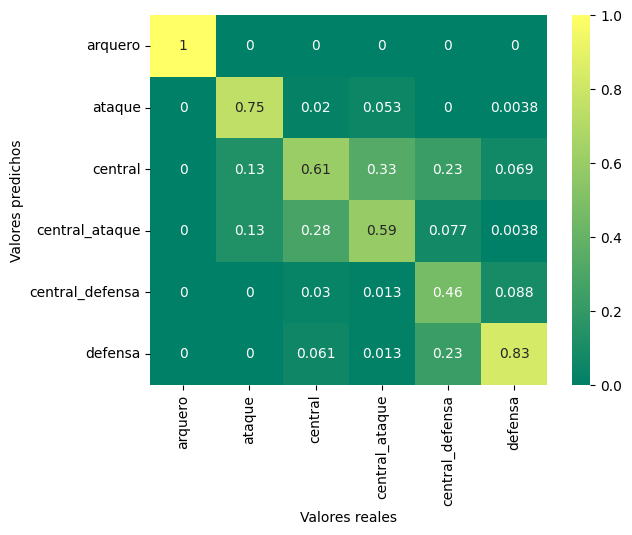

In [36]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
conf_matrix = pd.DataFrame(confusion_matrix(y_test_new,svc_results, normalize="pred"),columns=l_e.inverse_transform([0,1,2,3,4,5]),index=l_e.inverse_transform([0,1,2,3,4,5]))
sns.heatmap(conf_matrix,annot=True,cmap='summer',xticklabels=conf_matrix.columns,yticklabels=conf_matrix.columns)
plt.ylabel("Valores predichos")
plt.xlabel("Valores reales")
plt.show()

### Tarea 3

In [207]:
print(f"Encoding:{dict(zip([0,1,2,3,4,5],l_e.inverse_transform([0,1,2,3,4,5])))}")

Encoding:{0: 'arquero', 1: 'ataque', 2: 'central', 3: 'central_ataque', 4: 'central_defensa', 5: 'defensa'}


En este caso se ve que el modelo clasifica de manera correcta a los arqueros, lo cual debería ser normal, ya que con respecto a estadísticas ofensivas y defensivas referidas al balón, deberían ser los peores, con lo cual el modelo podría identificar a estos solo por ello. Luego los defensas también son bien identificados, teniendo la mayor confusión con los medio centros defensivos, lo cual también se ve normal, pues deberían tener características más o menos similares. Luego la siguiente clase mejor clasificada es la de ataque, teniendo la mayor confusión con los medio centros ofensivos y medio centros, lo cual hace sentido dado a que deberían tener características más que nada de ataque. Luego las peores clasificaciones son para las posiciones de medio centro, teniendo confusiones entre ellos mismos y el defensivo, confundiendose principalmente con las posiciones defensivas. Lo anterior hace sentido dado a que características del estilo pase, control, etc. deberían ser similares y serían las diferenciales con respecto a las demás posiciones.

En general se ve una clasificación bastante decente con un accuraccy de 0.76 y con confusiones que son bastante normales dada la data entregada. 

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos] Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

3. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

4. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

### Tarea 1

### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**